# Data Acquisition & Preparation #


First let's have a quick look at our data

In [31]:
import pandas as pd 
import matplotlib.pyplot as plt
list_df=pd.read_csv('C:/Users/chris/Desktop/Ex_Files_Learning_Python/listings.csv',sep=',')
print(list_df.head())
print(list_df.shape)

        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits at

Our goal is to see the connection between reviews and prices per neighbourhoods, so we are going to use only the columns that<br /> we want which are id, neighbourhood_group_cleansed, review_scores_rating and price.<br />
Then we store that in a new dataframe.

In [32]:
# I only want to check the connection between reviews and prices per neighbourhood
neighbor_columns=['id','neighbourhood_group_cleansed','review_scores_rating','price']
neighbor_df=pd.DataFrame(data=list_df, index=list_df.index, columns=neighbor_columns)

Let's see how our new dataframe looks like

In [33]:
# Quick look at the data
print(neighbor_df.head())
print(neighbor_df.shape)
print(neighbor_df.dtypes)

        id neighbourhood_group_cleansed  review_scores_rating    price
0   241032                   Queen Anne                  95.0   $85.00
1   953595                   Queen Anne                  96.0  $150.00
2  3308979                   Queen Anne                  97.0  $975.00
3  7421966                   Queen Anne                   NaN  $100.00
4   278830                   Queen Anne                  92.0  $450.00
(3818, 4)
id                                int64
neighbourhood_group_cleansed     object
review_scores_rating            float64
price                            object
dtype: object


As we see, price is placed as an object and has some symbols like 
$, so we need to change that.<br />
And while we do that let's check for duplicates and null values as well.

In [34]:
# Check for duplicates
print(neighbor_df.duplicated().sum())

0


No duplicates

In [36]:
# Check for nulls
print(neighbor_df.isnull().mean())

id                              0.00000
neighbourhood_group_cleansed    0.00000
review_scores_rating            0.16946
price                           0.00000
dtype: float64


We see that review_scores_rating has a percentage of its values as null values, so let's drop those rows in order to continue our project.

In [37]:
# Drop all null in the review column
neighbor_df=neighbor_df.dropna(subset=['review_scores_rating'],axis=0)
print(neighbor_df.isnull().mean())

id                              0.0
neighbourhood_group_cleansed    0.0
review_scores_rating            0.0
price                           0.0
dtype: float64


Time to deal with the price factor, so let's delete the symbols and turn the type from object to float.

In [38]:
# Remove $ and , from prices and convert them to numeric type
for i in '$,':
    neighbor_df['price'] = neighbor_df['price'].str.replace(i,'')
    
neighbor_df['price']=pd.to_numeric(neighbor_df['price'])
print(neighbor_df.dtypes)

id                                int64
neighbourhood_group_cleansed     object
review_scores_rating            float64
price                           float64
dtype: object


# Data Exploration #

Our third question is if there is any connection between reviews and prices per neighbourhood.<br />
So let's see the average review per neighbourhood and get a better view of the review distribution.

## Average review per neighbourhood ##

We will use the groupby command in order to group by neighbourhood.<br />
And we will sort the values in order to have a better view

In [39]:
# Check the average review per Neighbourhood
neighbourhood_review=neighbor_df.groupby(['neighbourhood_group_cleansed'])['review_scores_rating'].mean()
neighbourhood_review=neighbourhood_review.sort_values(ascending=False)
print(neighbourhood_review)

neighbourhood_group_cleansed
Central Area           96.009404
West Seattle           95.864198
Delridge               95.861538
Ballard                95.533679
Queen Anne             95.443089
Seward Park            95.025641
Rainier Valley         94.731343
Northgate              94.692308
Other neighborhoods    94.562500
Lake City              94.375000
Capitol Hill           94.184783
Beacon Hill            94.019417
Downtown               93.958333
Magnolia               93.787234
Interbay               93.777778
Cascade                92.461538
University District    88.437500
Name: review_scores_rating, dtype: float64


## Average price per neighbourhood ##

Now let's do the same we dide for the average reviews but now for the average prices, and then look at our findings

In [40]:
# Check the average price per neighbourhood
neighbourhood_price=neighbor_df.groupby(['neighbourhood_group_cleansed'])['price'].mean()
neighbourhood_price=neighbourhood_price.sort_values(ascending=False)
print(neighbourhood_price.mean)

<bound method Series.mean of neighbourhood_group_cleansed
Magnolia               185.829787
Queen Anne             161.402439
Downtown               154.280702
Cascade                145.338462
Capitol Hill           129.139130
West Seattle           128.993827
Central Area           126.119122
Ballard                123.647668
Other neighborhoods    118.004573
Seward Park            108.102564
University District     97.312500
Lake City               94.000000
Rainier Valley          90.358209
Northgate               90.153846
Interbay                89.666667
Beacon Hill             88.922330
Delridge                81.369231
Name: price, dtype: float64>


# Visualization

Now it's time to create some visualization plots in order to have a clear picture

## Bar chart for average reviews per neighbourhood

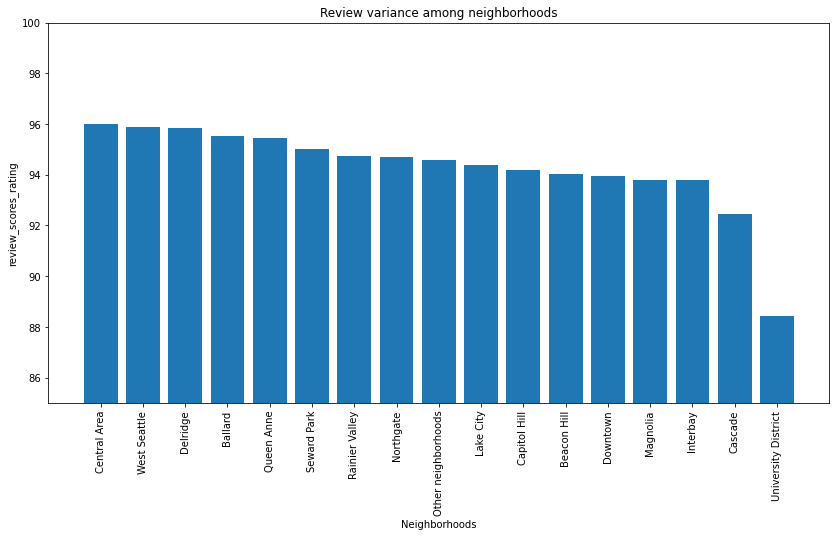

In [41]:
# Bar chart to see the review variance
plt.figure(figsize=(14,7))
plt.bar(neighbourhood_review.index,neighbourhood_review)
plt.xticks(rotation=90)
plt.xlabel('Neighborhoods')
plt.ylabel('review_scores_rating')
plt.title('Review variance among neighborhoods')
plt.ylim(85,100)
plt.show()


I changed the scale on the y axis in order to have a clearer picture as all of the average reviews are higher than 90 except one (University District)

## Bar chart for average prices per neighbourhood

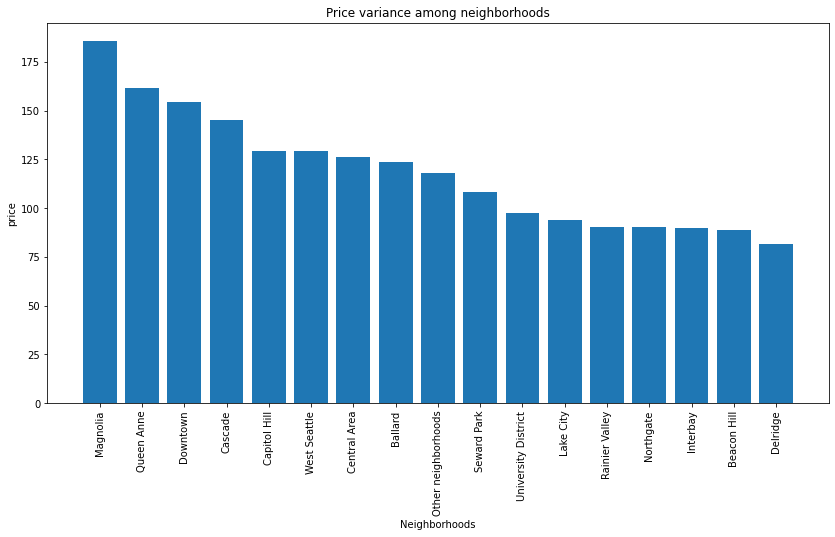

In [42]:
# Bar chart to see the price variance
plt.figure(figsize=(14,7))
plt.bar(neighbourhood_price.index,neighbourhood_price)
plt.xticks(rotation=90)
plt.xlabel('Neighborhoods')
plt.ylabel('price')
plt.title('Price variance among neighborhoods')
plt.show()





Here we can see a clearer distribution than this of the average reviews

# Conclusion

In order to compare average reviews and average prices i created 4 new lists in order to split the neighbourhoods in above and <br />below average review as well as below and over average prices.
The 4 lists are:<br />
1.neighbourhood_above_avgreview<br />
2.neighbourhood_below_avgreview<br />
3.neighbourhood_above_avgprice<br />
4.neighbourhood_below_avgprice

In [43]:
# Divide the neighbourhoods in 2 classe, above the average review and below the average review
neighbourhood_above_avgreview=neighbourhood_review[neighbourhood_review>neighbourhood_review.mean()]
neighbourhood_above_avgreview=neighbourhood_above_avgreview.index.tolist()

neighbourhood_below_avgreview=neighbourhood_review[neighbourhood_review<=neighbourhood_review.mean()]
neighbourhood_below_avgreview=neighbourhood_below_avgreview.index.tolist()

In [44]:
# Divide the neighbourhoods in 2 classe, above the average price and below the average price
neighbourhood_above_avgprice=neighbourhood_price[neighbourhood_price>neighbourhood_price.mean()]
neighbourhood_above_avgprice=neighbourhood_above_avgprice.index.tolist()

neighbourhood_below_avgprice=neighbourhood_price[neighbourhood_price<=neighbourhood_price.mean()]
neighbourhood_below_avgprice=neighbourhood_below_avgprice.index.tolist()

Let's see the different lists each neighbourhood exists in

In [45]:
#Neighbourhoods with high review and high prices
print(list(set(neighbourhood_above_avgreview) & set(neighbourhood_above_avgprice) ))

#Neighbourhoods with high review and low prices
print(list(set(neighbourhood_above_avgreview) & set(neighbourhood_below_avgprice) ))

#Neighbourhoods with low review and high prices
print(list(set(neighbourhood_below_avgreview) & set(neighbourhood_above_avgprice) ))

#Neighbourhoods with low review and low prices
print(list(set(neighbourhood_below_avgreview) & set(neighbourhood_below_avgprice) ))

['West Seattle', 'Ballard', 'Queen Anne', 'Central Area']
['Other neighborhoods', 'Northgate', 'Rainier Valley', 'Seward Park', 'Lake City', 'Delridge']
['Downtown', 'Capitol Hill', 'Cascade', 'Magnolia']
['Interbay', 'Beacon Hill', 'University District']


## So as a result we see that average revies prices don't always go side by side##
<br />
example(Other neighborhoods, Northgate, Rainier Valley, Seward Park, Lake City, Delridge all have high reviews but are below average prices)
